In [1]:
import cv2 
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import utils as ut
import refFont
from termcolor import colored

font = refFont.Font()


TC 1 
Trail 0

TC 2 
Trail 0

TC 3 
Trail 0

TC 4 
Trail 0

TC 5 
Trail 0

TC 5 
Trail 1

TC 5 
Trail 2


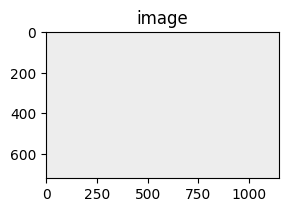

c:\Users\Ahmed Bakr\Downloads\Compressed\finalCreditCard\utils.py:413: RuntimeWarning: invalid value encountered in divide
  gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
c:\Users\Ahmed Bakr\Downloads\Compressed\finalCreditCard\utils.py:414: RuntimeWarning: invalid value encountered in cast
  gradX = gradX.astype("uint8")



TC 6 
Trail 0

TC 6 
Trail 1

TC 6 
Trail 2


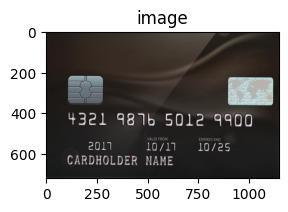


TC 7 
Trail 0

TC 7 
Trail 1

TC 8 
Trail 0

TC 8 
Trail 1

TC 8 
Trail 2


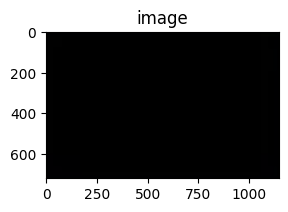


TC 9 
Trail 0

TC 9 
Trail 1

TC 9 
Trail 2


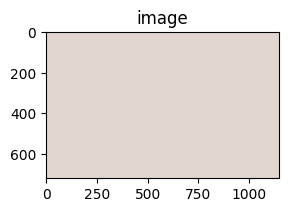


TC 10 
Trail 0

TC 10 
Trail 1

TC 10 
Trail 2


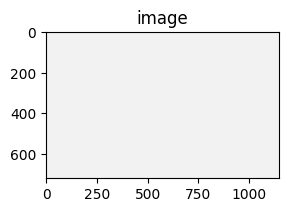


TC 11 
Trail 0

TC 11 
Trail 1

TC 11 
Trail 2


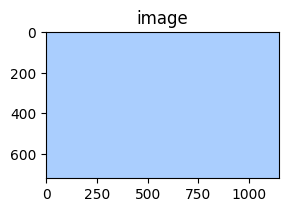


TC 12 
Trail 0

TC 12 
Trail 1

TC 12 
Trail 2


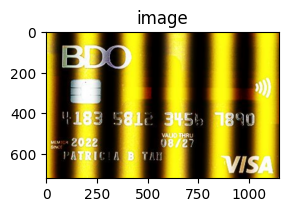


TC 13 
Trail 0

TC 13 
Trail 1

TC 13 
Trail 2


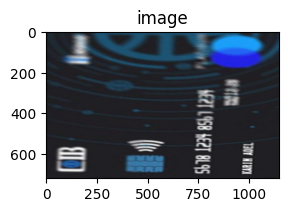


TC 14 
Trail 0

TC 14 
Trail 1

TC 14 
Trail 2


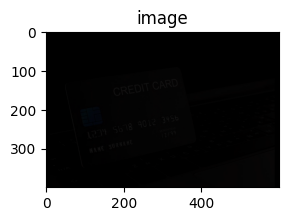


TC 15 
Trail 0

TC 15 
Trail 1

TC 15 
Trail 2


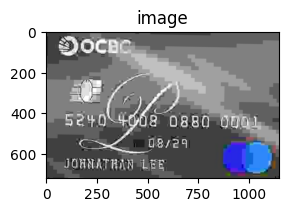


TC 16 
Trail 0

TC 16 
Trail 1

TC 16 
Trail 2


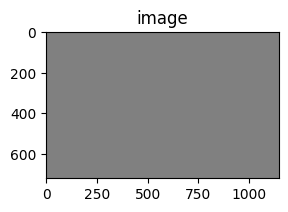


TC 1:


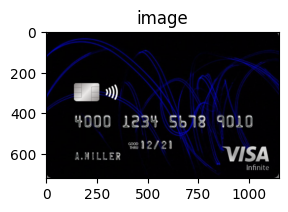

expected  : 4000123456789010
difference: 4000123456789010
output    : 4000123456789010

TC 2:


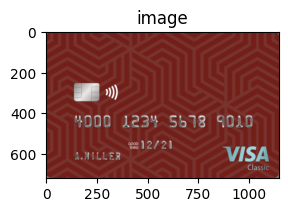

expected  : 400012345678 9010
difference: 40001234567839010
output    : 4000123456739010

TC 3:


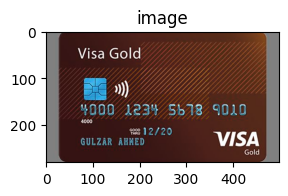

expected  : 400012345678 9010
difference: 40001234567839010
output    : 4000123456739010

TC 4:


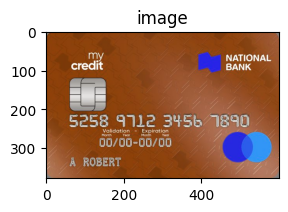

expected  : 5258971234567890
difference: 5258971234567890
output    : 5258971234567890

TC 6:


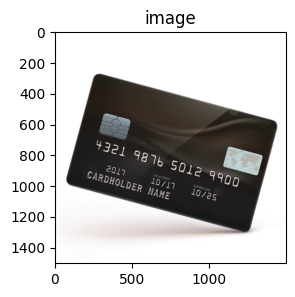

expected  : 432198 765012    9900
difference: 432198276501210259900
output    : 43219276501210259900

TC 7:


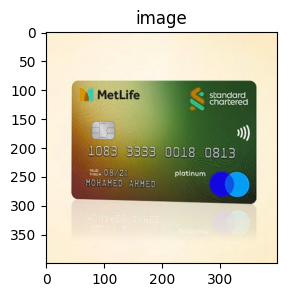

expected  : 108 33333    00180813
difference: 108233333169000180813
output    : 10233333169000180813


In [2]:
def printResult(result):
    print("")
    print(f"TC {result[0]}:")   # TC number
    ut.showImage(result[1]  )   # TC image
    print(f"{result[2]}")   #  Text

imagePaths= ut.getImagePathsInDirectory("./TC")
# imagePaths=["./TC/01.jpg","./TC/02.jpg","./TC/03.jpg","./TC/04.jpg"]

debug=False
results=[]
for i,imagePath in enumerate(imagePaths,start=0):
    image= cv2.imread(imagePath)
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    for j in range(0,3):                           # 10 maximum number of trails
        print("")
        print(f"TC {i+1} \nTrail {j}")
        imageCopy= image.copy()
        if j==1:                        # try to remove background
            otsuThresh= cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
            _,(start_row, end_row, start_col, end_col)= ut.removeBackground(otsuThresh)
            imageCopy= image[start_row:end_row,start_col:end_col]
            pass
        
        if j==2:                # try to fix prespective
            imageCopy=ut.fixPerspective(image.copy())
            ut.showImage(imageCopy)
            pass
        
        result =ut.highlight_differences( ut.TcPans[i] , ut.getPanUpdated(imageCopy,font,debug,debug))
        if result[1]<10:
            results.append((i+1,image,result[0]))
            break

for result in results:
    printResult(result)